In [89]:
# Pima Indians Diabetes Dataset - Exploration

In [90]:
#Objective: Load the dataset and perform initial Exploratory Data Analysis (EDA).

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Configure plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [92]:
## Load Data

In [93]:

data_path = os.path.join('..', 'data', 'diabetes.csv')

try:
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully from {data_path}")
except FileNotFoundError:
    print(f"Error: Dataset file not found at {data_path}")
    print("Please ensure 'diabetes.csv' is in the 'data' directory.")

Dataset loaded successfully from ..\data\diabetes.csv


In [94]:
if 'df' in locals():
    print("First 5 rows:")
    display(df.head())
    print("\nDataset Info:")
    df.info()
    print("\nDescriptive Statistics:")
    display(df.describe())

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [95]:
## Initial Visualizations ### Distribution of Features 

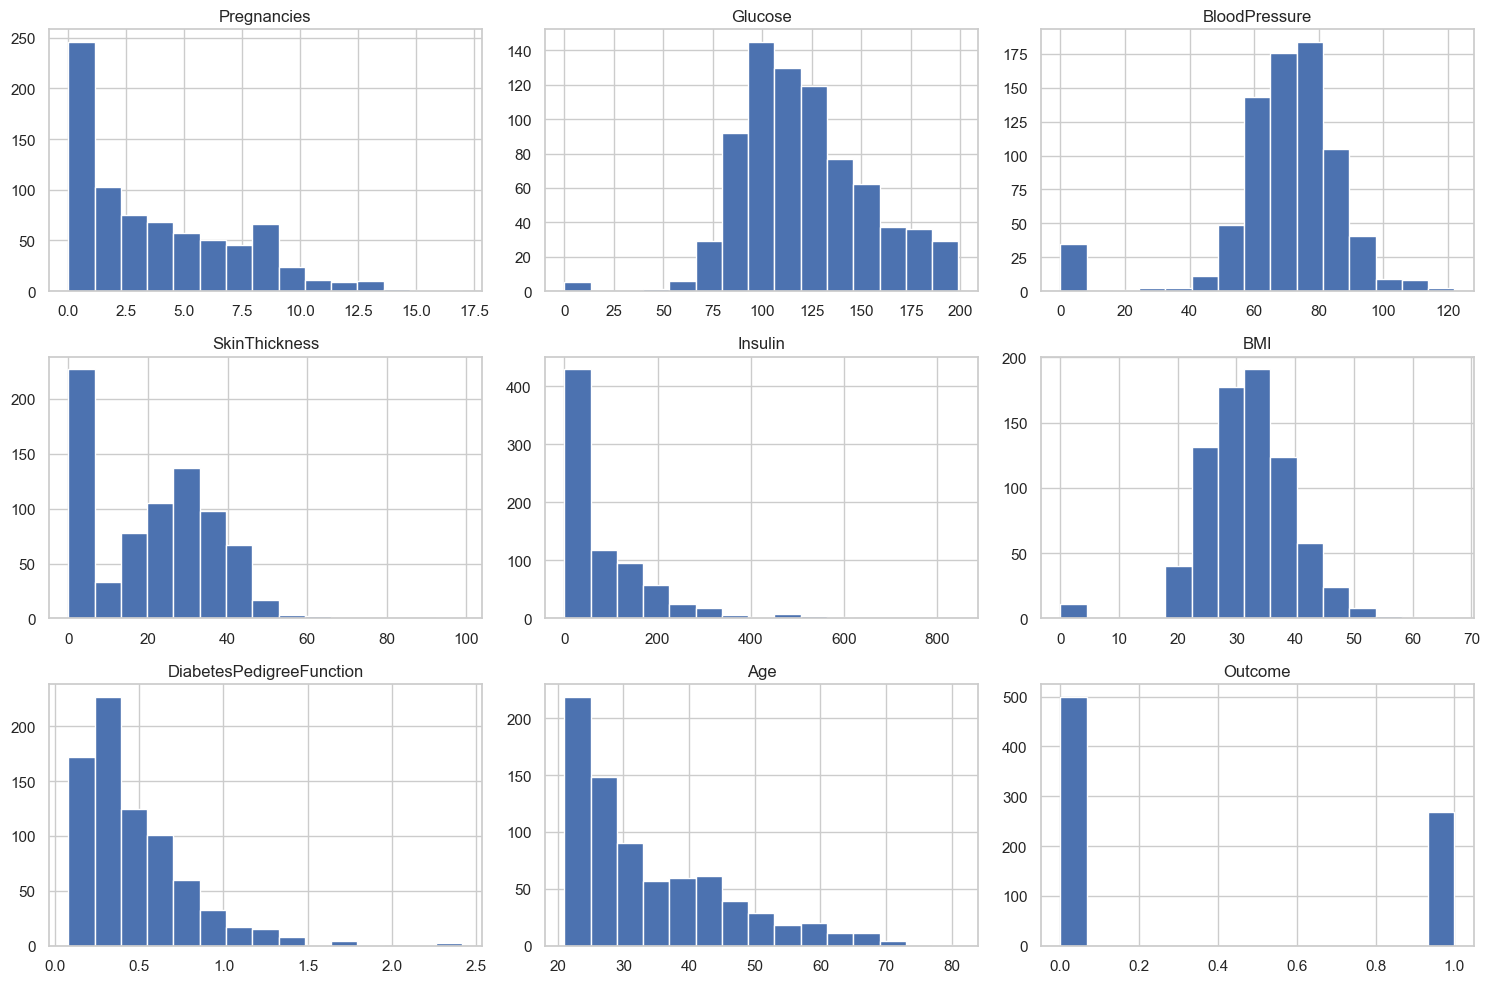

In [96]:
if 'df' in locals():
    # Select only numeric columns for histograms
    numeric_df = df.select_dtypes(include=np.number)
    numeric_df.hist(bins=15, figsize=(15, 10), layout=(-1, 3))
    plt.tight_layout()
    plt.show()

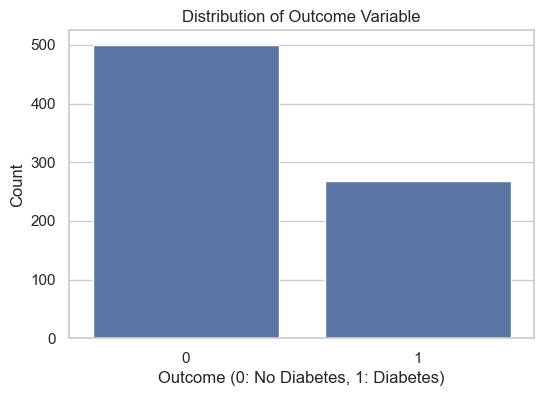

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [97]:
if 'df' in locals() and 'Outcome' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Outcome', data=df)
    plt.title('Distribution of Outcome Variable')
    plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    plt.ylabel('Count')
    plt.show()
    print(df['Outcome'].value_counts(normalize=True))

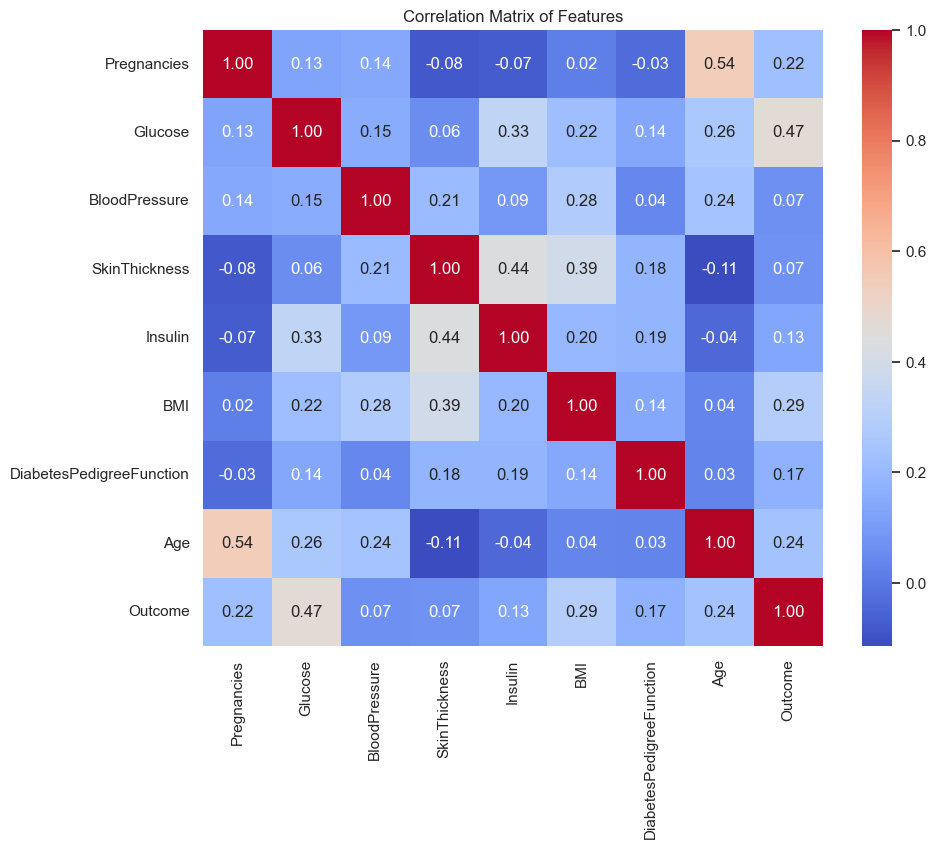

In [98]:
if 'df' in locals():
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Features')
    plt.show()

In [99]:
## Data Preprocessing

#Based on EDA, we need to handle the '0' values in certain columns which likely represent missing data. We'll also apply transformations to handle skewness and scale the features.

In [100]:
# Make a copy to avoid modifying the original dataframe loaded
df_processed = df.copy()

# Columns where 0 is biologically impossible and  mean missing data
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN in these columns
# Using .loc to avoid SettingWithCopyWarning
df_processed.loc[:, cols_with_zeros] = df_processed[cols_with_zeros].replace(0, np.nan)

# Display number of NaNs in each column to verify
print("NaN counts after replacing zeros:")
print(df_processed[cols_with_zeros].isnull().sum())

NaN counts after replacing zeros:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_8996\3514164922.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 115. 126.  99. 196. 119. 143. 125. 147.  97.
 145. 117. 109. 158.  88.  92. 122. 103. 138. 102.  90. 111. 180. 133.
 106. 171. 159. 180. 146.  71. 103. 105. 103. 101.  88. 176. 150.  73.
 187. 100. 146. 105.  84. 133.  44. 141. 114.  99. 109. 109.  95. 146.
 100. 139. 126. 129.  79.  nan  62.  95. 131. 112. 113.  74.  83. 101.
 137. 110. 106. 100. 136. 107.  80. 123.  81. 134. 142. 144.  92.  71.
  93. 122. 163. 151. 125.  81.  85. 126.  96. 144.  83.  95. 171. 155.
  89.  76. 160. 146. 124.  78.  97.  99. 162. 111. 107. 132. 113.  88.
 120. 118. 117. 105. 173. 122. 170.  84.  96. 125. 100.  93. 129. 105.
 128. 106. 108. 108. 154. 102.  57. 106. 147.  90. 136. 114. 156. 153.
 188. 152.  99. 109.  88. 163. 151. 10

In [101]:
median_impute_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [102]:
### Missing Value Heatmap

#Let's visualize the locations of the missing values (NaNs) we introduced by replacing zeros.

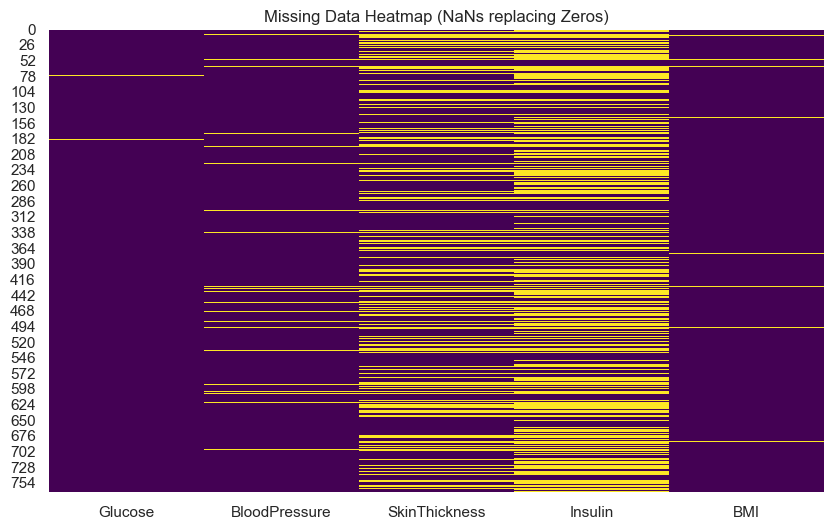

In [103]:
# Check if df_processed exists
if 'df_processed' in locals():
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_processed[cols_with_zeros].isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap (NaNs replacing Zeros)')
    plt.show()
else:
    print("Run the previous cell to create df_processed first.")

In [104]:
### Box Plots by Outcome

#Visualizing key predictors split by the outcome can show potential separation.

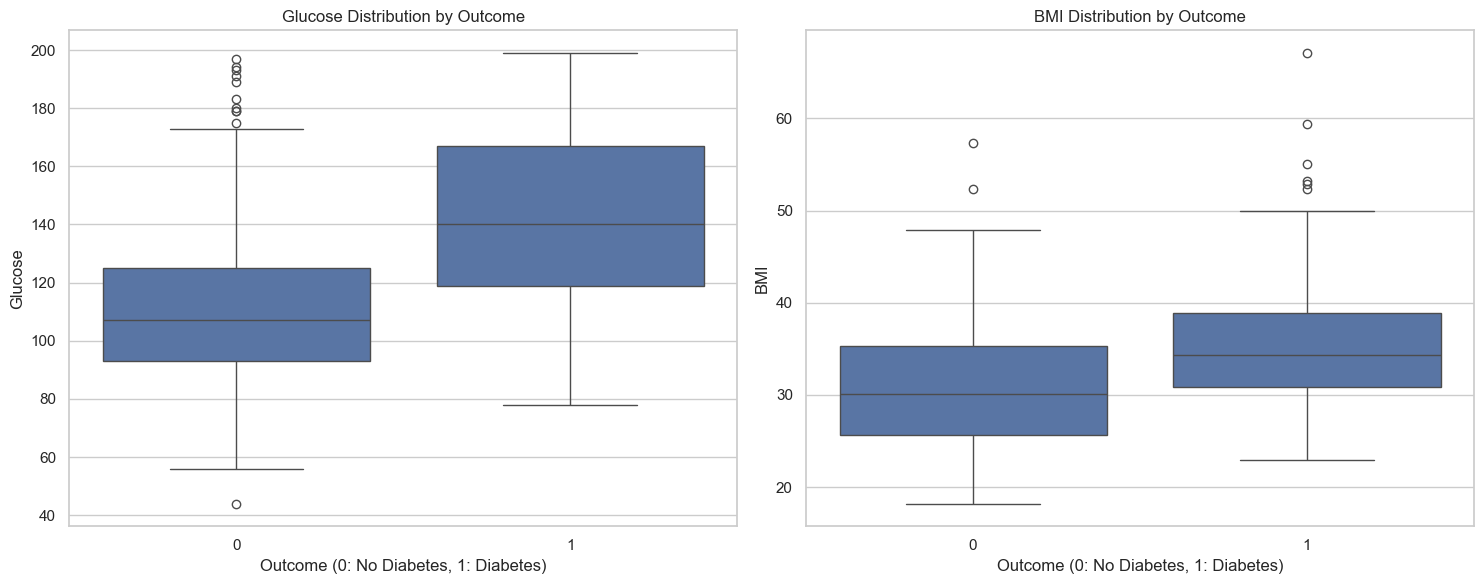

In [105]:
# Check if df_processed exists
if 'df_processed' in locals() and 'Outcome' in df_processed.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Glucose vs Outcome
    sns.boxplot(x='Outcome', y='Glucose', data=df_processed, ax=axes[0])
    axes[0].set_title('Glucose Distribution by Outcome')
    axes[0].set_xlabel('Outcome (0: No Diabetes, 1: Diabetes)')

    # BMI vs Outcome
    sns.boxplot(x='Outcome', y='BMI', data=df_processed, ax=axes[1])
    axes[1].set_title('BMI Distribution by Outcome')
    axes[1].set_xlabel('Outcome (0: No Diabetes, 1: Diabetes)')

    plt.tight_layout()
    plt.show()
else:
    print("Run the cell creating df_processed first.")


In [106]:
### Pair Plot for Top Correlated Features

#Let's look at the relationships between the features most correlated with Outcome (`Glucose`, `BMI`, `Age`).

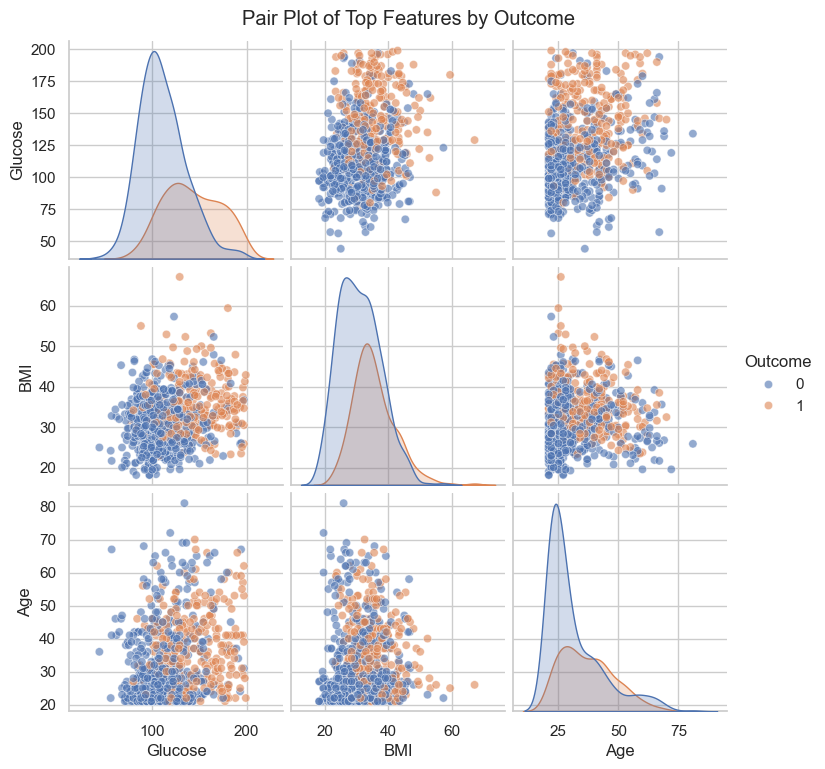

In [107]:
# Check if df_processed exists
if 'df_processed' in locals() and 'Outcome' in df_processed.columns:
    # Select top features plus Outcome
    top_features = ['Glucose', 'BMI', 'Age', 'Outcome']
    sns.pairplot(df_processed[top_features], hue='Outcome', diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle('Pair Plot of Top Features by Outcome', y=1.02) # Adjust title position
    plt.show()
else:
    print("Run the cell creating df_processed first.")

In [108]:
### Feature Distributions Before vs. After Imputation (Median)

#Let's compare the distributions of the columns we'll impute (those that had zeros) before and after applying median imputation. We apply imputation *only* for this visualization on a temporary copy.

Plotting distributions Before (blue) and After (red) median imputation


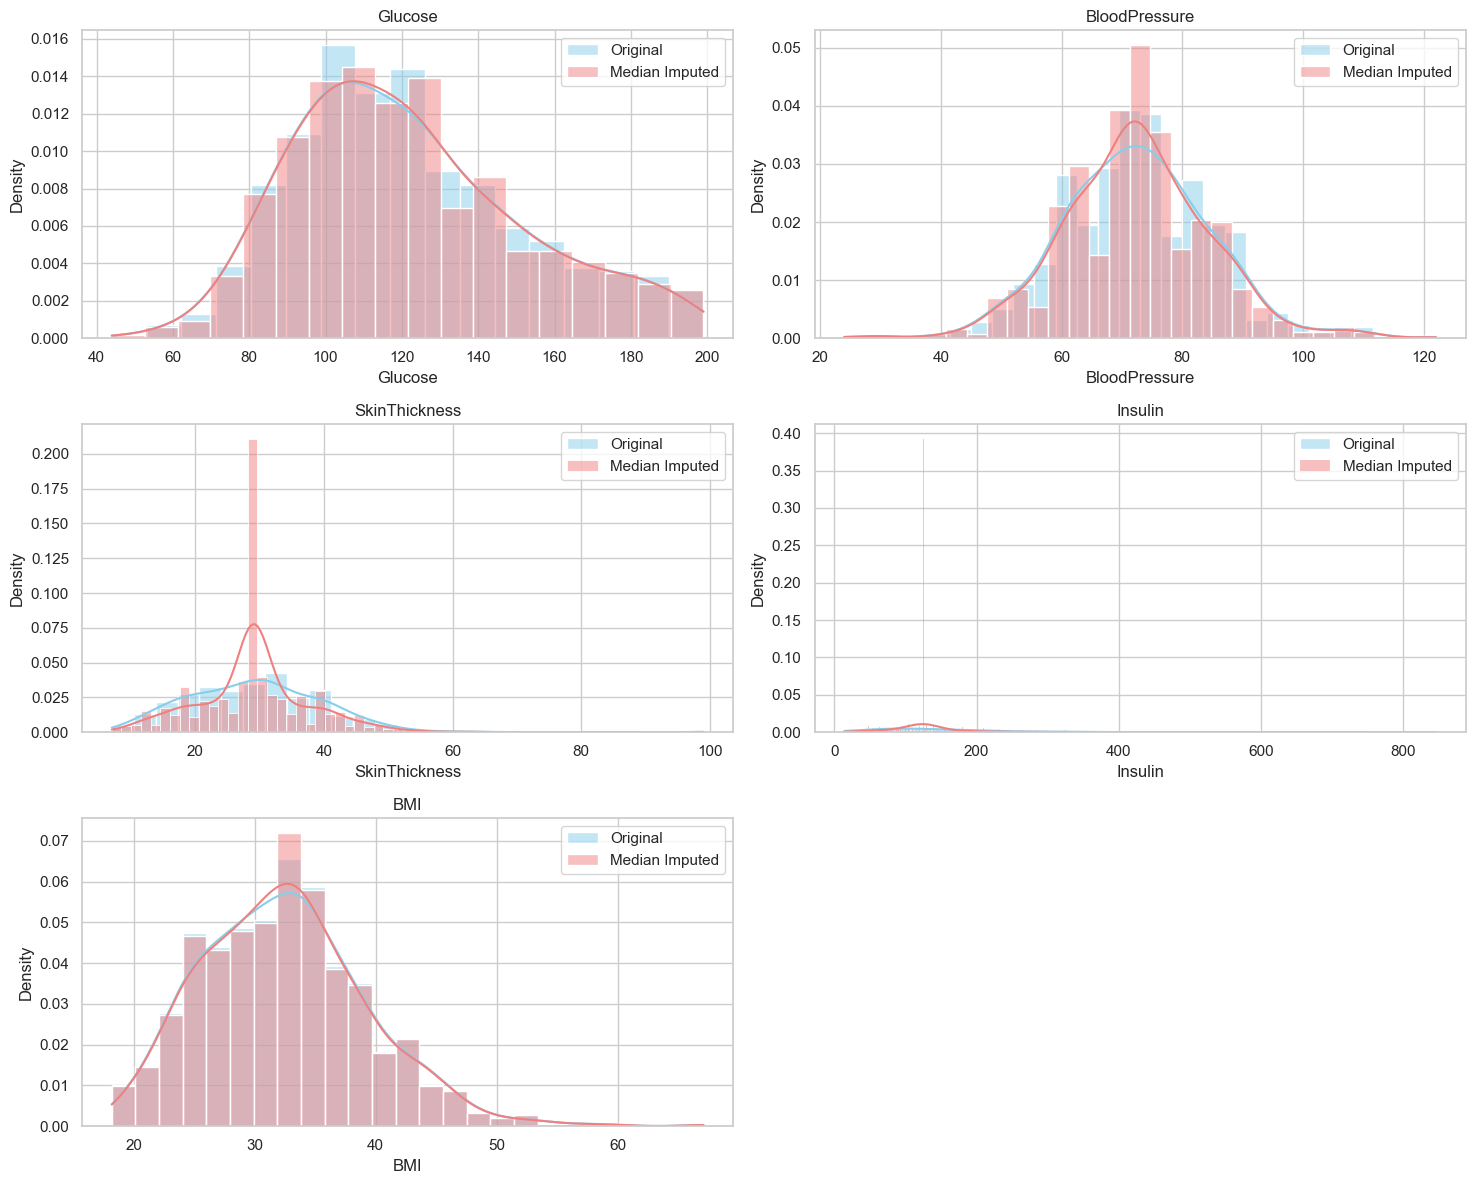

In [109]:
# make sure df_processed and median_impute_features exist
if 'df_processed' in locals():
    temp_imputer = SimpleImputer(strategy='median')

    # create median‐imputed copy
    df_median_imputed = df_processed.copy()
    df_median_imputed[median_impute_features] = temp_imputer.fit_transform(
        df_median_imputed[median_impute_features]
    )

    # for plotting only
    df_imputed_vis = df_processed.copy()
    df_imputed_vis[median_impute_features] = temp_imputer.transform(
        df_imputed_vis[median_impute_features]
    )

    # plot before vs after
    print("Plotting distributions Before (blue) and After (red) median imputation")
    n_cols = 2
    n_rows = (len(median_impute_features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
    axes = axes.flatten()
    for i, col in enumerate(median_impute_features):
        sns.histplot(df_processed[col].dropna(), color='skyblue', label='Original', kde=True,
                     stat="density", ax=axes[i])
        sns.histplot(df_imputed_vis[col], color='lightcoral', label='Median Imputed', kde=True,
                     stat="density", ax=axes[i])
        axes[i].set_title(col); axes[i].legend()
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
else:
    print("Run the cell that creates df_processed first.")

In [110]:
# must be *after* Cell A so df_median_imputed exists
knn_impute_features = ['SkinThickness', 'Insulin']
df_knn_imputed = df_median_imputed.copy()

knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed[knn_impute_features] = knn_imputer.fit_transform(
    df_knn_imputed[knn_impute_features]
)

print("Missing after KNN (should be 0):")
print(df_knn_imputed[knn_impute_features].isnull().sum())

Missing after KNN (should be 0):
SkinThickness    0
Insulin          0
dtype: int64


Comparing distributions (Original vs. Median vs. KNN)


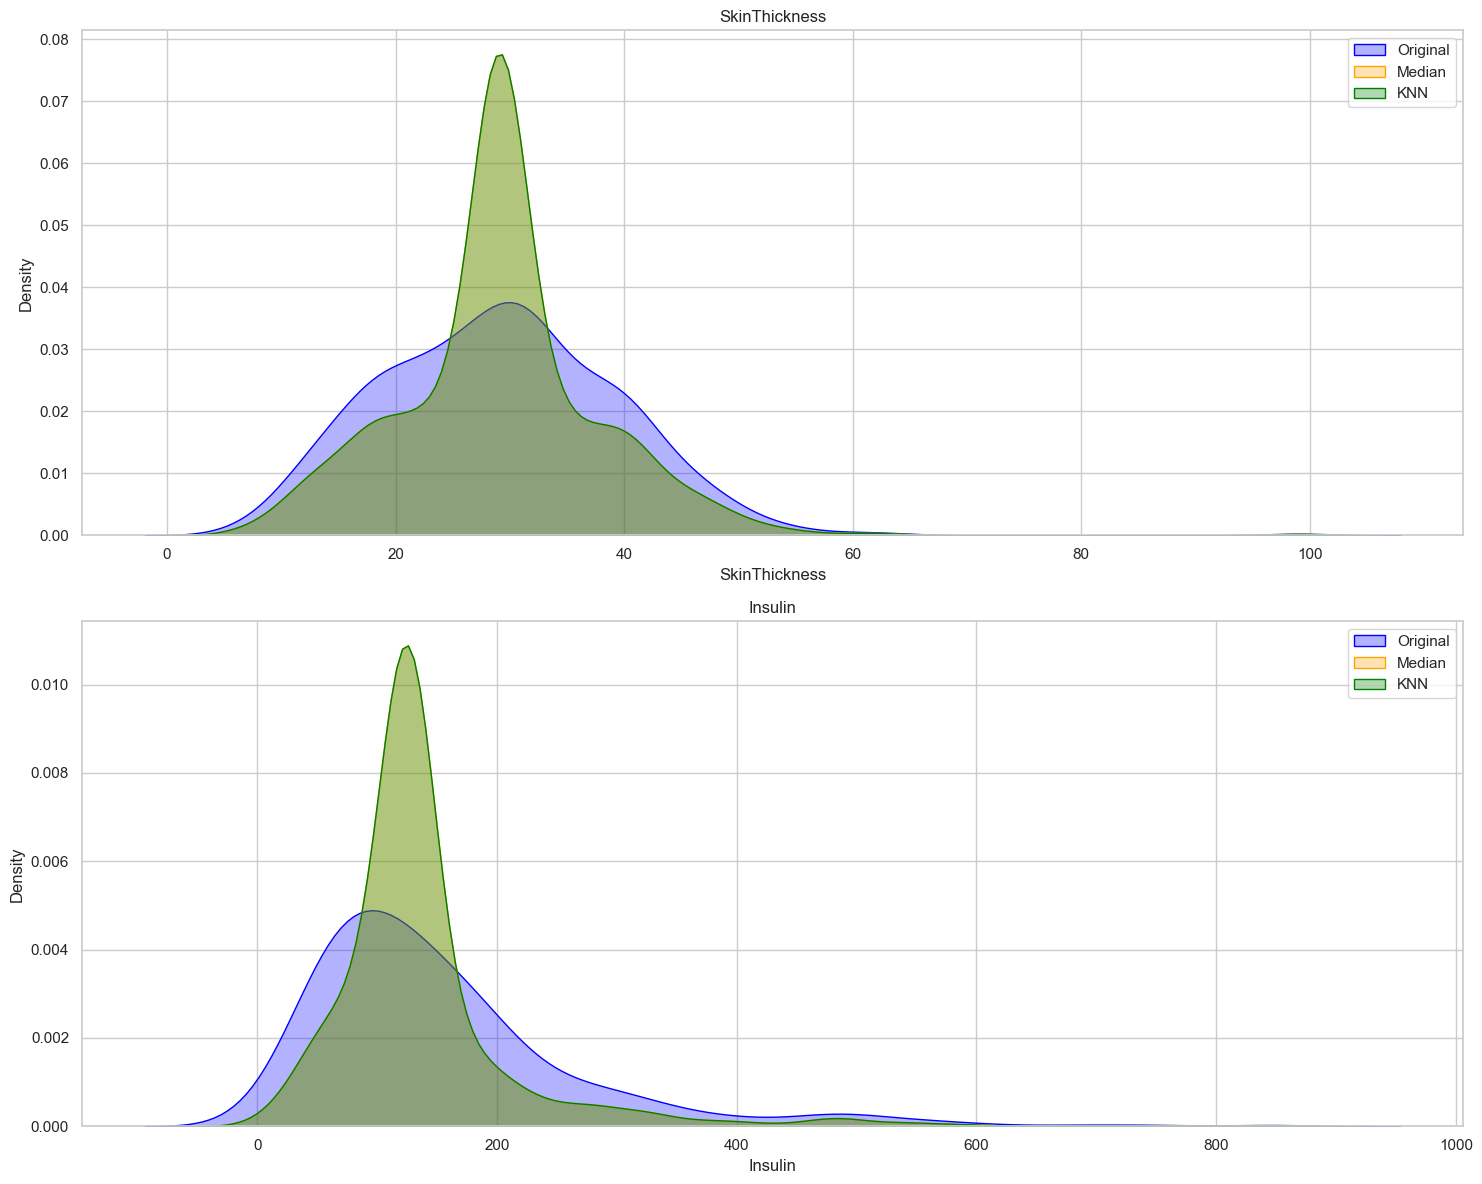

In [111]:
df_with_nans = df_processed.copy()  # after zero→NaN, before any impute

print("Comparing distributions (Original vs. Median vs. KNN)")
plt.figure(figsize=(15, 6*len(knn_impute_features)))
for i, col in enumerate(knn_impute_features):
    plt.subplot(len(knn_impute_features), 1, i+1)
    sns.kdeplot(df_with_nans[col].dropna(), label='Original', fill=True, alpha=0.3, color='blue')
    sns.kdeplot(df_median_imputed[col],       label='Median',   fill=True, alpha=0.3, color='orange')
    sns.kdeplot(df_knn_imputed[col],          label='KNN',      fill=True, alpha=0.3, color='green')
    plt.title(col); plt.legend()
plt.tight_layout()
plt.show()

In [112]:
#Now we separate features (X) and target (y), and split into training and testing sets. We use stratification to maintain the class proportion in both sets due to the imbalance observed earlier.

In [113]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

# Split into training and testing sets (80% train, 20% test)
# Stratify ensures the proportion of outcomes is the same in train and test sets
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print("\nTraining set Outcome distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set Outcome distribution:")
print(y_test.value_counts(normalize=True))

Training set shape: X_train=(614, 8), y_train=(614,)
Testing set shape: X_test=(154, 8), y_test=(154,)

Training set Outcome distribution:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Testing set Outcome distribution:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [114]:
### Build Preprocessing Pipeline

#We'll now build the pipeline 
 #  Maybe Impute NaNs (using Median for the columns that had zeros).
 #(Maybe: Add KNNImputer - let's start simpler first).
 # Apply Yeo-Johnson power transform to skewed features.
 # Standard scale all features.


In [115]:
# Cell for defining and applying the final preprocessing pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer 
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
import numpy as np 


# Define features for each imputation strategy
knn_impute_features = ['SkinThickness', 'Insulin']
median_impute_features = ['Glucose', 'BloodPressure', 'BMI']
# Identify remaining numeric columns that don't need imputation
# Adjust this list based on the columns present in your X_train *before* this cell
other_numeric_cols = ['Pregnancies', 'DiabetesPedigreeFunction', 'Age'] 

# Create the ColumnTransformer for combined imputation
# This applies KNN to specific columns, Median to others, and passes through the rest
imputer = ColumnTransformer(
    transformers=[
        ('knn_imp', KNNImputer(n_neighbors=5), knn_impute_features),
        ('median_imp', SimpleImputer(strategy="median", add_indicator=True), median_impute_features) # add_indicator=True is good practice
    ],
    remainder='passthrough' 
)

numeric_transformer = Pipeline(steps=[
    ('power_transform', PowerTransformer(method='yeo-johnson')), # Handles skewness
    ('scaler', StandardScaler()) # Scales data
])

# Create the full preprocessing pipeline
full_preprocessor = Pipeline(steps=[
    ('imputer', imputer),             # Apply KNN and Median imputation
    ('transformer', numeric_transformer) # Apply PowerTransform and Scaling
])

# Fit the preprocessor on the training data
# It learns imputation values, transformation parameters, and scaling parameters from X_train
print("Fitting preprocessor pipeline on training data...")
full_preprocessor.fit(X_train)
print("Preprocessor fitting complete.")

# Apply the fitted preprocessor to transform train and test data
X_train_processed = full_preprocessor.transform(X_train)
X_test_processed = full_preprocessor.transform(X_test)

print(f"\nShape of processed training data: {X_train_processed.shape}")
print(f"Shape of processed testing data: {X_test_processed.shape}")

# Check for NaNs in processed data (should be 0 after imputation)
print(f"\nNaNs in processed training data: {np.isnan(X_train_processed).sum()}")
print(f"NaNs in processed testing data: {np.isnan(X_test_processed).sum()}")

Fitting preprocessor pipeline on training data...
Preprocessor fitting complete.

Shape of processed training data: (614, 11)
Shape of processed testing data: (154, 11)

NaNs in processed training data: 0
NaNs in processed testing data: 0
